# Problem set 6: Walras-equilibrium models

**Table of contents**<a id='toc0_'></a>    
- 1. [Simple supply and demand](#toc1_)    
- 2. [Exchange economy with quasi-linear preferences](#toc2_)    
  - 2.1. [Improvement set](#toc2_1_)    
  - 2.2. [Equilibrium](#toc2_2_)    
  - 2.3. [Dictators](#toc2_3_)    
- 3. [Production Economy with CO2 tax](#toc3_)    
  - 3.1. [Labor supply](#toc3_1_)    
  - 3.2. [Grid search](#toc3_2_)    
  - 3.3. [Equilibrium prices](#toc3_3_)    
  - 3.4. [Optimal CO2 tax](#toc3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from scipy import optimize

## 1. <a id='toc1_'></a>[Simple supply and demand](#toc0_)

In a simple market model, the **demand function** gives the quantity of a good that consumers are willing to buy
at each price, while the **supply function** gives the quantity that producers are willing to sell.

An **equilibrium** occurs when the quantity demanded equals the quantity supplied:

$$
D(p^*) = S(p^*)
$$

or equivalently when **excess demand** $ Z(p) = D(p) - S(p) $ equals zero.

The equilibrium price $ p^* $ is found by solving:

$$
Z(p) = 0
$$

Once $ p^* $ is found, the corresponding equilibrium quantity is $ q^* = D(p^*) = S(p^*) $.

Here are the demand, supply and excess demand functions:

In [4]:
# Linear supply and demand
def demand(p, a=10, b=1):
    """Demand: D(p) = a - b*p"""
    return a - b * p

def supply(p, c=2, d=1):
    """Supply: S(p) = c + d*p"""
    return c + d * p

def excess_demand(p,do_print=False):
    """Excess demand function"""

    Z = demand(p) - supply(p)
    if do_print: print(f'p = {p:12.8f}, {Z = :12.8f}')

    return Z

**Question a:** Find the equilibrium price with a root-finder.

In [6]:
obj = lambda p: excess_demand(p,do_print=True)
res = optimize.root_scalar(obj, method = 'bisect', bracket = [0, 10], xtol=1e-8)

p_star = res.root
q_star = supply(p_star)

print(f'Eqm. price: $p^{{*}}$ = {p_star:.2f}')
print(f'Eqm. quantity: $q^{{*}}$ = {q_star:.2f}')

p =   0.00000000, Z =   8.00000000
p =  10.00000000, Z = -12.00000000
p =   5.00000000, Z =  -2.00000000
p =   2.50000000, Z =   3.00000000
p =   3.75000000, Z =   0.50000000
p =   4.37500000, Z =  -0.75000000
p =   4.06250000, Z =  -0.12500000
p =   3.90625000, Z =   0.18750000
p =   3.98437500, Z =   0.03125000
p =   4.02343750, Z =  -0.04687500
p =   4.00390625, Z =  -0.00781250
p =   3.99414062, Z =   0.01171875
p =   3.99902344, Z =   0.00195312
p =   4.00146484, Z =  -0.00292969
p =   4.00024414, Z =  -0.00048828
p =   3.99963379, Z =   0.00073242
p =   3.99993896, Z =   0.00012207
p =   4.00009155, Z =  -0.00018311
p =   4.00001526, Z =  -0.00003052
p =   3.99997711, Z =   0.00004578
p =   3.99999619, Z =   0.00000763
p =   4.00000572, Z =  -0.00001144
p =   4.00000095, Z =  -0.00000191
p =   3.99999857, Z =   0.00000286
p =   3.99999976, Z =   0.00000048
p =   4.00000036, Z =  -0.00000072
p =   4.00000006, Z =  -0.00000012
p =   3.99999991, Z =   0.00000018
p =   3.99999999, Z 

**Question b:** Find the equilibrium price applying the following auction-like algorithm (also called tâtonnement).

1. Guess on $p = 5.0$ and set $i=0$
1. Calculate $Z(p)$.
1. Stop if $Z(p) < \text{tol.}$.
1. Else set $p = p + \nu Z(p)$ and go to step 2 if $i+1 < \text{maxiter}$.


In [7]:
nu = 0.1
p = 5.0
tol = 1e-8
maxiter = 100
for i in range(maxiter):
    Z = excess_demand(p)
    if Z < tol: 
        break
    else: 
        p = p + nu*Z
    print(f'Iteration {i+1:3d}: p = {p:12.8f}, Z = {Z:12.8f}')

if abs(Z) < tol:
    print(f'Tâtonnement converged in {i+1} iterations to price p = {p:.8f}')
else:
    print(f'Tâtonnement did not converge in {maxiter} iterations.')

Tâtonnement did not converge in 100 iterations.


## 2. <a id='toc2_'></a>[Exchange economy with quasi-linear preferences](#toc0_)

We consider an **exchange economy** like the one in the lecture, but with **quasi-linear preferencer**.

The general setup is:

- Two consumers, A and B.
- Two goods, $x_{1}$ and $x_{2}$. 

**Endowments:**

* The initial endowments are $\omega_{1}^{A}\geq0$ and $\omega_{2}^{A}\geq0$. 
* The total endowment of each good is always one, such that $\omega_{1}^{B} = 1-\omega_{1}^{A}$ and $\omega_{2}^{B} = 1-\omega_{2}^{A}$.
* We define the vectors $\boldsymbol{\omega}^{A}$ = $(\omega_{1}^{A},\omega_{2}^{A})$, and $\boldsymbol{\omega}^{B}=(\omega_{1}^{B},\omega_{2}^{B})$.

**Prices:** $\boldsymbol{p}=(p_{1},p_{2})$ with numeraire $p_2 = 1$.

**Utility functions**:

$$
\begin{aligned}
u^{A}(x_{1},x_{2})	&= \log(x_{1}) + {\alpha} x_{2},\,\,\,\alpha>0 \\
u^{B}(x_{1},x_{2})	&= \log(x_{1}) + {\beta} x_{2},\,\,\,\beta>0 \\
\end{aligned}
$$

**Demand functions:** We define the vectors $\boldsymbol{x}^{A}$ = $(x_{1}^{A},x_{2}^{A})$, and $\boldsymbol{x}^{B}=(x_{1}^{B},x_{2}^{B})$.

$$
\begin{aligned}
x^{A\star}(\boldsymbol{p},\boldsymbol{\omega^A}) & =
\begin{cases}
\left(\frac{ p_{2}}{\alpha p_{1}},\frac{m-\frac{p_{2}}{\alpha}}{p_{2}}\right)
& \text{if }m^A>\frac{p_{2}}{\alpha} \\
\left(\frac{m}{p_{1}},0\right) 
& \text{if }m^A\leq\frac{p_{2}}{\alpha} 
\end{cases} \\
m^A &= p_1 \omega_1^A + p_2 \omega_2^A 
\end{aligned}
$$

$$
\begin{aligned}
x^{A\star}(\boldsymbol{p},\boldsymbol{\omega^B}) & =
\begin{cases}
\left(\frac{ p_{2}}{\alpha p_{1}},\frac{m-\frac{p_{2}}{\alpha}}{p_{2}}\right)
& \text{if }m^B>\frac{p_{2}}{\alpha} \\
\left(\frac{m}{p_{1}},0\right) 
& \text{if }m^B\leq\frac{p_{2}}{\alpha} 
\end{cases} \\
m^B &= p_1 \omega_1^B + p_2 \omega_2^B
\end{aligned}
$$

**Walras equilibrium**: Market clearing requires demand = endowment (supply),

$$
\begin{aligned}
x_{1}^{A\star}(\boldsymbol{p},\boldsymbol{\omega}^{A})+x_{1}^{B\star}(\boldsymbol{p},\boldsymbol{\omega}^{B}) &= \omega_{1}^{A}+\omega_{1}^{B} \\
x_{2}^{A\star}(\boldsymbol{p},\boldsymbol{\omega}^{A})+x_{2}^{B\star}(\boldsymbol{p},\boldsymbol{\omega}^{B}) &= \omega_{2}^{A}+\omega_{2}^{B}
\end{aligned}
$$ 

The class `ExchangeEconomyModelQuasiLinearClass` in `ExchangeEconomyModelQuasiLinear.py` is the starting point for solving this model:

1. It inherites the basic functationality from `ExchangeEconomyModelClass` in `ExchangeEconomyModel.py`.
2. You will be updating the currently not implemented methods.

In [8]:
from ExchangeEconomyQuasiLinearModel import ExchangeEconomyModelQuasiLinearClass

**Note:** The solution model class is in `A2_ExchangeEconomyQuasiLinearModel.py`.

### 2.1. <a id='toc2_1_'></a>[Improvement set](#toc0_)

Update the `.indifference_curve_A` and `.indifference_curve_B` methods.

Create a figure with:

1. The endowment
1. The improvement set
1. The indifferences curves through the endowment
1. Indifferences curves just below and above the endowment

Remember to use the plotting functionalities in the class.

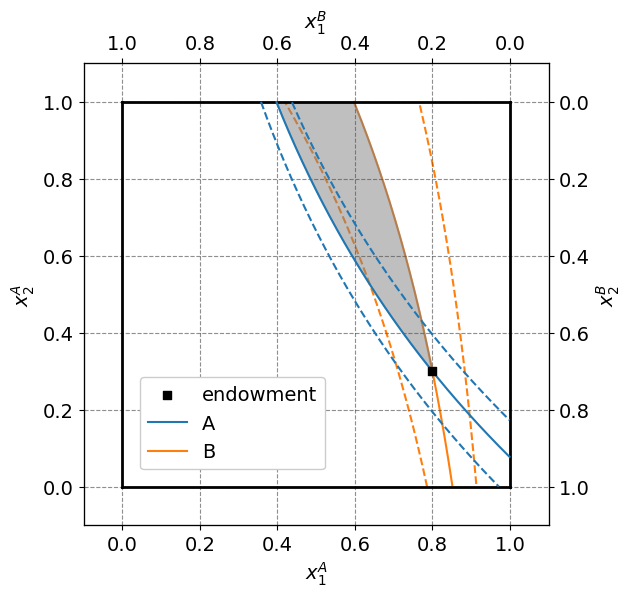

In [15]:
from A2_ExchangeEconomyQuasiLinearModel import ExchangeEconomyQuasiLinearModelClass

model = ExchangeEconomyQuasiLinearModelClass()
par = model.par
sol = model.sol
sim = model.sim

fig,ax_A,ax_B = model.create_edgeworthbox()

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment',zorder=3)

model.indifference_curve_A(ax_A,par.w1A,par.w2A,color=colors[0],label='A')
model.indifference_curve_A(ax_A,par.w1A*0.9,par.w2A,color=colors[0],label=None,ls='--')
model.indifference_curve_A(ax_A,par.w1A*1.1,par.w2A,color=colors[0],label=None,ls='--')

model.indifference_curve_B(ax_B,1-par.w1A,1-par.w2A,color=colors[1],label='B')
model.indifference_curve_B(ax_B,1-par.w1A*0.9,1-par.w2A*0.9,color=colors[1],label=None,ls='--')
model.indifference_curve_B(ax_B,1-par.w1A*1.1,1-par.w2A*1.1,color=colors[1],label=None,ls='--')

model.plot_improvement_set(ax_A)

model.add_legend(ax_A,ax_B)

### 2.2. <a id='toc2_2_'></a>[Equilibrium](#toc0_)

**Task:** Update the `.demand_A` and `.demand_B` methods.

**Question A:** Solve for the Walras-equilibrium.

In [17]:
from A2_ExchangeEconomyQuasiLinearModel import ExchangeEconomyQuasiLinearModelClass
model = ExchangeEconomyQuasiLinearModelClass()

In [18]:
model.solve_walras(p_guess=1.0,print_output=True)

  0: p1 =   1.00000000 -> excess demand of good 1 ->     0.90000000, x1A =   1.00000000, x2A =   0.10000000, x1B =   0.90000000, x2B =   0.00000000
  1: p1 =   1.45000000 -> excess demand of good 1 ->     0.37241379, x1A =   0.68965517, x2A =   0.46000000, x1B =   0.68275862, x2B =   0.00000000
  2: p1 =   1.63620690 -> excess demand of good 1 ->     0.22233930, x1A =   0.61116965, x2A =   0.60896552, x1B =   0.61116965, x2B =   0.02724138
  3: p1 =   1.74737655 -> excess demand of good 1 ->     0.14457299, x1A =   0.57228649, x2A =   0.69790124, x1B =   0.57228649, x2B =   0.04947531
  4: p1 =   1.81966304 -> excess demand of good 1 ->     0.09910459, x1A =   0.54955229, x2A =   0.75573043, x1B =   0.54955229, x2B =   0.06393261
  5: p1 =   1.86921534 -> excess demand of good 1 ->     0.06996768, x1A =   0.53498384, x2A =   0.79537227, x1B =   0.53498384, x2B =   0.07384307
 10: p1 =   1.97101674 -> excess demand of good 1 ->     0.01470472, x1A =   0.50735236, x2A =   0.87681339, x1B

**Question B:** Show how the equilibrium price and allocation varies with $\alpha \in [0.5,3.0]$.

In [23]:
for alpha in np.linspace(0.5,3.0,20):
    model_ = ExchangeEconomyQuasiLinearModelClass()
    model_.par.alpha = alpha
    model_.solve_walras(p_guess=1.0,print_output=False)
    print(f'alpha = {alpha:0.2f} -> Equilibrium price p1* = {model_.sol.p1:7.4f}, x1A* = {model_.sol.xA[0]:7.4f}, x2A* = {model_.sol.xA[1]:7.4f}')

alpha = 0.50 -> Equilibrium price p1* =  3.0000, x1A* =  0.6667, x2A* =  0.7000
alpha = 0.63 -> Equilibrium price p1* =  2.5833, x1A* =  0.6129, x2A* =  0.7833
alpha = 0.76 -> Equilibrium price p1* =  2.3103, x1A* =  0.5672, x2A* =  0.8379
alpha = 0.89 -> Equilibrium price p1* =  2.1176, x1A* =  0.5278, x2A* =  0.8765
alpha = 1.03 -> Equilibrium price p1* =  1.9744, x1A* =  0.4935, x2A* =  0.9051
alpha = 1.16 -> Equilibrium price p1* =  1.8636, x1A* =  0.4634, x2A* =  0.9273
alpha = 1.29 -> Equilibrium price p1* =  1.7755, x1A* =  0.4368, x2A* =  0.9449
alpha = 1.42 -> Equilibrium price p1* =  1.7037, x1A* =  0.4130, x2A* =  0.9593
alpha = 1.55 -> Equilibrium price p1* =  1.6441, x1A* =  0.3918, x2A* =  0.9712
alpha = 1.68 -> Equilibrium price p1* =  1.5937, x1A* =  0.3725, x2A* =  0.9812
alpha = 1.82 -> Equilibrium price p1* =  1.5507, x1A* =  0.3551, x2A* =  0.9899
alpha = 1.95 -> Equilibrium price p1* =  1.5135, x1A* =  0.3393, x2A* =  0.9973
alpha = 2.08 -> Equilibrium price p1* = 

**Question C:** Find the equilibrium when $\alpha = 0.1$.

In [26]:
model_ = ExchangeEconomyQuasiLinearModelClass()
model_.par.alpha = 0.1

try:
    model_.solve_walras(p_guess=1.0,print_output=False)
except:
    print(f'No convergence for alpha = {model_.par.alpha:.2f}')

# ADD SOME CODE HERE

print('Trying again...')
model_.solve_walras(p_guess=1.0,print_output=True)

No convergence for alpha = 0.10
Trying again...
  0: p1 =   1.00000000 -> excess demand of good 1 ->     1.00000000, x1A =   1.10000000, x2A =   0.00000000, x1B =   0.90000000, x2B =   0.00000000
  1: p1 =   1.50000000 -> excess demand of good 1 ->     0.66666667, x1A =   1.00000000, x2A =   0.00000000, x1B =   0.66666667, x2B =   0.00000000
  2: p1 =   1.83333333 -> excess demand of good 1 ->     0.50909091, x1A =   0.96363636, x2A =   0.00000000, x1B =   0.54545455, x2B =   0.06666667
  3: p1 =   2.08787879 -> excess demand of good 1 ->     0.42264151, x1A =   0.94368650, x2A =   0.00000000, x1B =   0.47895501, x2B =   0.11757576
  4: p1 =   2.29919954 -> excess demand of good 1 ->     0.36541417, x1A =   0.93048019, x2A =   0.00000000, x1B =   0.43493398, x2B =   0.15983991
  5: p1 =   2.48190663 -> excess demand of good 1 ->     0.32379086, x1A =   0.92087481, x2A =   0.00000000, x1B =   0.40291604, x2B =   0.19638133
 10: p1 =   3.15852354 -> excess demand of good 1 ->     0.21158

ValueError: Max iterations exceeded

### 2.3. <a id='toc2_3_'></a>[Dictators](#toc0_)

When A is dictator, A maximizes own utility:

$$
\max_{(x_{1}^{A},x_{2}^{A})\in[0,1]\times[0,1]}u^{A}(x_{1}^{A},x_{2}^{A})	
$$

subject to B utility not being worse than with her endowment,

$$
u^{B}(1-x_{1}^{A},1-x_{2}^{A})\geq u^{B}(\omega_{1}^{B},\omega_{2}^{B})
$$

**Question A:** Solve the dictator problem for A and plot the solution together with the endowment, the improvement set, and the equilibrium.

Dictator solution for A:
x1A =   0.59724946
x2A =   1.00000000
Utility =   0.48457960


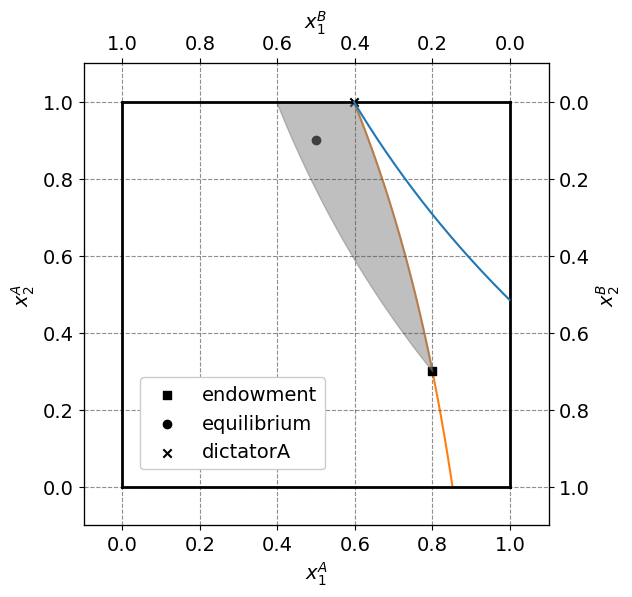

In [27]:
# write your code here

model.solve_dictator_A()

par = model.par
sol = model.sol

fig,ax_A,ax_B = model.create_edgeworthbox()

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(sol.xA[0],sol.xA[1],marker='o',color='black',label='equilibrium')
ax_A.scatter(sol.xA_dictatorA[0],sol.xA_dictatorA[1],marker='x',color='black',label='dictatorA')

model.indifference_curve_A(ax_A,sol.xA_dictatorA[0],sol.xA_dictatorA[1],color=colors[0])
model.indifference_curve_B(ax_B,1-sol.xA_dictatorA[0],1-sol.xA_dictatorA[1],color=colors[1])

model.plot_improvement_set(ax_A)
model.add_legend(ax_A,ax_B)

**Question B:** Solve the dictator problem for B and plot the solution the endowment, the improvement set, the equilibrium and the outcome when A is dictator.

Dictator solution for B:
x1B =   0.50000203
x2B =   0.76999915
Utility =  -0.46315039


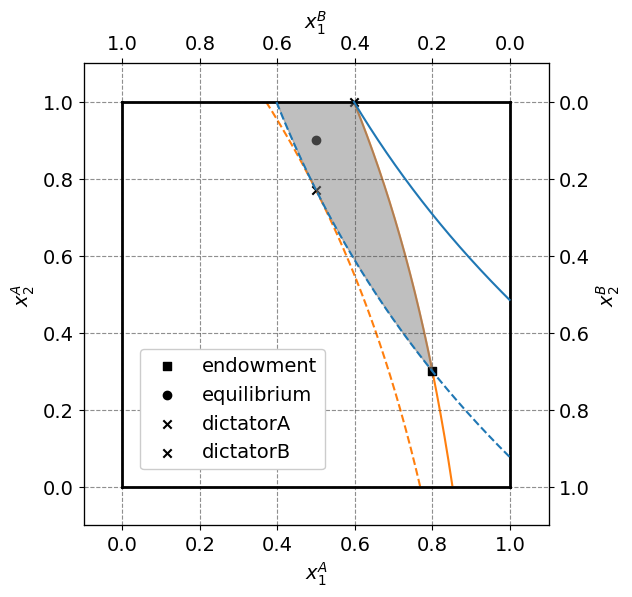

In [28]:
# write your code here
model.solve_dictator_B()

par = model.par
sol = model.sol

fig,ax_A,ax_B = model.create_edgeworthbox()

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(sol.xA[0],sol.xA[1],marker='o',color='black',label='equilibrium')
ax_A.scatter(sol.xA_dictatorA[0],sol.xA_dictatorA[1],marker='x',color='black',label='dictatorA')
ax_A.scatter(sol.xA_dictatorB[0],sol.xA_dictatorB[1],marker='x',color='black',label='dictatorB')

model.indifference_curve_A(ax_A,sol.xA_dictatorA[0],sol.xA_dictatorA[1],color=colors[0])
model.indifference_curve_B(ax_B,1-sol.xA_dictatorA[0],1-sol.xA_dictatorA[1],color=colors[1])

model.indifference_curve_A(ax_A,sol.xA_dictatorB[0],sol.xA_dictatorB[1],color=colors[0],ls='--')
model.indifference_curve_B(ax_B,1-sol.xA_dictatorB[0],1-sol.xA_dictatorB[1],color=colors[1],ls='--')

model.plot_improvement_set(ax_A)
model.add_legend(ax_A,ax_B)


## 3. <a id='toc3_'></a>[Production Economy with CO2 tax](#toc0_)

Consider a production economy with **two firms** indexed by $j \in \{1,2\}$.

Each produce its own good, and maximize profits:

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

**Firm 1 is green = no emissions. Firm is black = emissions proportional to output.**

**Optimal firm behavior** is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The **implied profits** are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single **consumer** supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm. She maximizes utility:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax on good 2 and $T$ is a lump-sum transfer.

For a given $\ell$, it can be shown that optimal consumption behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$

**Optimal labor supply** is:

$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$

This implies **optimal consumption** as:

$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$

The **government** chooses $\tau$ and balances its budget so $T=\tau c_2^*$.

We initially set $\tau,T=0$. But the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

where $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Market clearing** requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$

We choose $w=1$ as numeraire.

In [29]:
from ProductionCO2Model import ProductionCO2ModelClass

**Note:** The solution model class is in `A3_ProductionCO2Model.py`.

### 3.1. <a id='toc3_1_'></a>[Labor supply](#toc0_)

**Task:** Add the numerical optimizer in the `.households` method.

**Question a:** Let $p_1$ vary in `[0.5,1.0,1.5]` and vary $p_2$ in `[0.5,1.0,1.5]`. How does labor supply and consumption change?

In [32]:
model = ProductionCO2ModelClass()

model.sol.pi1 = 0.0
model.sol.pi2 = 0.0
p2 = 1.0
for p1 in [0.5,1.0,1.5]:
    for p2 in [0.5,1.0,1.5]:
        model.households(p1,p2)
        print(f'p1 = {p1:0.2f}, p2 = {p2:0.2f}')
        print(f'households: l = {model.sol.l:0.4f}, c1 = {model.sol.c1:0.4f}, c2 = {model.sol.c2:0.4f}')
        print()

p1 = 0.50, p2 = 0.50
households: l = 0.9678, c1 = 0.6407, c2 = 1.4949

p1 = 0.50, p2 = 1.00
households: l = 0.9678, c1 = 0.6407, c2 = 0.7474

p1 = 0.50, p2 = 1.50
households: l = 0.9678, c1 = 0.6407, c2 = 0.4983

p1 = 1.00, p2 = 0.50
households: l = 0.9678, c1 = 0.3203, c2 = 1.4949

p1 = 1.00, p2 = 1.00
households: l = 0.9678, c1 = 0.3203, c2 = 0.7474

p1 = 1.00, p2 = 1.50
households: l = 0.9678, c1 = 0.3203, c2 = 0.4983

p1 = 1.50, p2 = 0.50
households: l = 0.9678, c1 = 0.2136, c2 = 1.4949

p1 = 1.50, p2 = 1.00
households: l = 0.9678, c1 = 0.2136, c2 = 0.7474

p1 = 1.50, p2 = 1.50
households: l = 0.9678, c1 = 0.2136, c2 = 0.4983



**Question b:** Let $p_1$ vary in `[0.5,1.0,1.5]` and vary $p_2$ in `[0.5,1.0,1.5]`. How does firm behvior, firm profit and household labor supply and consumption change?

In [33]:
p2 = 1.0
for p1 in [0.5,1.0,1.5]:
    for p2 in [0.5,1.0,1.5]:
        model.firms(p1,p2)
        model.households(p1,p2)
        print(f'p1 = {p1:0.2f}, p2 = {p2:0.2f}')
        print(f'firms: y1 = {model.sol.y1:0.4f}, y2 = {model.sol.y2:0.4f}, pi1 = {model.sol.pi1:0.4f}, pi2 = {model.sol.pi2:0.4f}')
        print(f'households: l = {model.sol.l:0.4f}, c1 = {model.sol.c1:0.4f}, c2 = {model.sol.c2:0.4f}')
        print()

p1 = 0.50, p2 = 0.50
firms: y1 = 0.2500, y2 = 0.2500, pi1 = 0.0625, pi2 = 0.0625
households: l = 0.9303, c1 = 0.6932, c2 = 1.6175

p1 = 0.50, p2 = 1.00
firms: y1 = 0.2500, y2 = 0.5000, pi1 = 0.0625, pi2 = 0.2500
households: l = 0.8797, c1 = 0.7753, c2 = 0.9045

p1 = 0.50, p2 = 1.50
firms: y1 = 0.2500, y2 = 0.7500, pi1 = 0.0625, pi2 = 0.5625
households: l = 0.8077, c1 = 0.9196, c2 = 0.7153

p1 = 1.00, p2 = 0.50
firms: y1 = 0.5000, y2 = 0.2500, pi1 = 0.2500, pi2 = 0.0625
households: l = 0.8797, c1 = 0.3877, c2 = 1.8091

p1 = 1.00, p2 = 1.00
firms: y1 = 0.5000, y2 = 0.5000, pi1 = 0.2500, pi2 = 0.2500
households: l = 0.8348, c1 = 0.4304, c2 = 1.0044

p1 = 1.00, p2 = 1.50
firms: y1 = 0.5000, y2 = 0.7500, pi1 = 0.2500, pi2 = 0.5625
households: l = 0.7708, c1 = 0.5050, c2 = 0.7855

p1 = 1.50, p2 = 0.50
firms: y1 = 0.7500, y2 = 0.2500, pi1 = 0.5625, pi2 = 0.0625
households: l = 0.8077, c1 = 0.3065, c2 = 2.1458

p1 = 1.50, p2 = 1.00
firms: y1 = 0.7500, y2 = 0.5000, pi1 = 0.5625, pi2 = 0.2500
ho

### 3.2. <a id='toc3_2_'></a>[Grid search](#toc0_)

**Task:** Add the required code in the `.market_clearing` method.

**Question:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`, and determine where they are closest to being fulfilled.

In [34]:
model.solve_grid_search(do_print=True)

sol.p1_approx = 0.94, sol.p2_approx = 1.58


### 3.3. <a id='toc3_3_'></a>[Equilibrium prices](#toc0_)

**Task:** Add the required code in the `.solve` method.

**Question:** Find the equilibrium prices $p_1$ and $p_2$.

In [38]:
model.solve(do_print=True)

sol.y1 = 0.51, sol.y2 = 0.78, sol.p1 = 1.02, sol.p2 = 1.55
Error in market clearing for good 1:   0.00000000
Error in market clearing for good 2:   0.00000000


True

### 3.4. <a id='toc3_4_'></a>[Optimal CO2 tax](#toc0_)

**Task:** Add the required code in the `.optimal_gov` method.

**Question:** What value of $\tau$ should the government choose to maximize $SWF$?

grid search:
tau = 0.000, sol.U = -0.5272, SWF = -0.60483
tau = 0.031, sol.U = -0.5272, SWF = -0.60447
tau = 0.061, sol.U = -0.5273, SWF = -0.60419
tau = 0.092, sol.U = -0.5275, SWF = -0.60397
tau = 0.122, sol.U = -0.5277, SWF = -0.60382
tau = 0.153, sol.U = -0.5280, SWF = -0.60373
tau = 0.184, sol.U = -0.5283, SWF = -0.60370
tau = 0.214, sol.U = -0.5287, SWF = -0.60374
tau = 0.245, sol.U = -0.5292, SWF = -0.60383
tau = 0.276, sol.U = -0.5297, SWF = -0.60397

Equilibrium with optimal tau:
sol.y1 = 0.52, sol.y2 = 0.75, sol.p1 = 1.04, sol.p2 = 1.51
Error in market clearing for good 1:  -0.00000000
Error in market clearing for good 2:  -0.00000000
tau = 0.182, sol.U = -0.5283, SWF = -0.60370


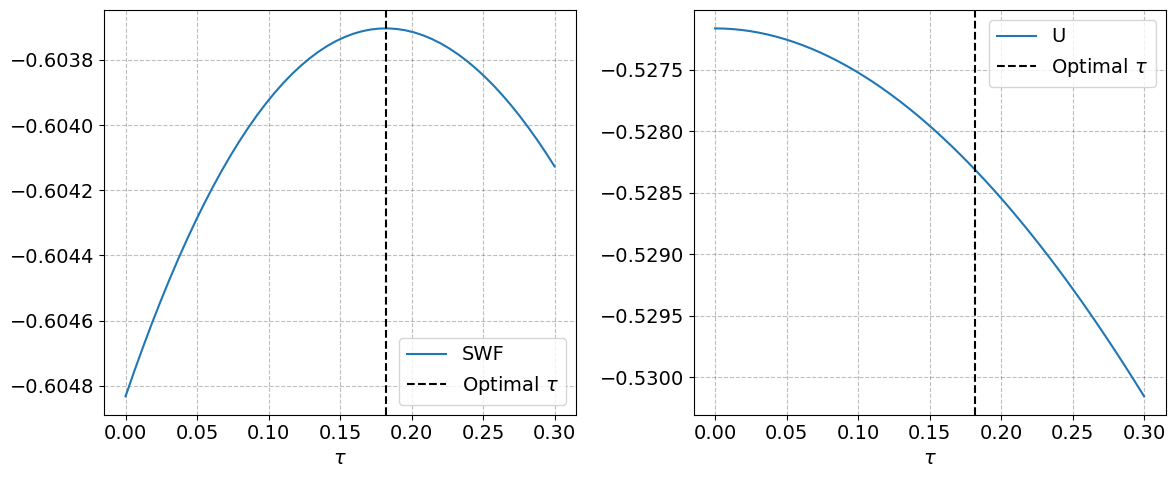

In [39]:
model.optimal_gov()